### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [115]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [117]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [118]:
X[1].min(), X[1].max()

(0, 10)

In [119]:
X[2].min(), X[2].max()

(450, 2000)

In [120]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [121]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [122]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

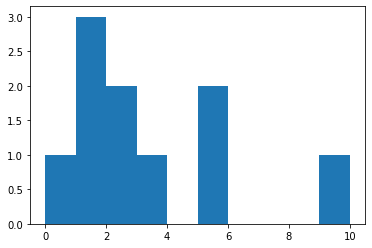

In [123]:
plt.hist(X[1])
plt.show()

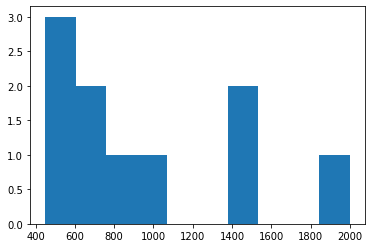

In [124]:
plt.hist(X[2])
plt.show()

In [125]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [126]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

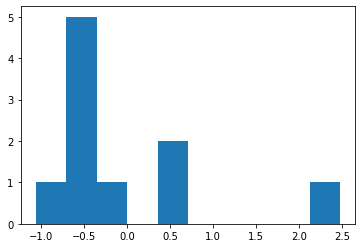

In [127]:
plt.hist(X_st[1])
plt.show()

In [128]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [129]:
# import sklearn
# from sklearn import preprocessing

# preprocessing.StandartScaler() #Стандартизайия
# preprocessing.MinMaxScaler() #Нормализация

In [130]:
X_st[2] = calc_std_fit(X[2])

In [131]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [132]:
# SGD (Stochastic gradient descent)

In [133]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [134]:
W = np.random.randn(X.shape[0])
W

array([-0.23415337, -0.23413696,  1.57921282,  0.76743473])

In [135]:
# классический  GD
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [136]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [48.94473361  5.13572063  3.03087164  4.15901061] 86.32200637688133
200 [55.49802393  5.49175538  2.38263866  4.54287323] 27.22829232719348
300 [56.36711838  5.71048289  1.85487927  4.87452659] 25.761444384247277
400 [56.4823773   5.85792198  1.43425702  5.16424219] 25.458733058441158
500 [56.49766289  5.96112109  1.09671564  5.41113665] 25.27159669845679
600 [56.49969005  6.03587123  0.82450782  5.61831692] 25.14816013082492
700 [56.49995889  6.09163208  0.60423802  5.79047023] 25.06635657988186
800 [56.49999455  6.1342319   0.42557809  5.9326066 ] 25.012064237630277
900 [56.49999928  6.16738265  0.28043529  6.04946622] 24.9760071895491
1000 [56.4999999   6.19353679  0.16239276  6.14527522] 24.95205350123849


array([56.4999999 ,  6.19353679,  0.16239276,  6.14527522])

In [137]:
# стохастический GS
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [138]:
eval_sgd_model(X_st, y, iterations=50000, qty_in_batch=4, alpha=1e-2)

5000 [56.51062031  6.31269557 -0.36446011  6.58451737] 11.289353911527972
10000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289182005570598
15000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330378
20000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
25000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
30000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
35000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
40000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
45000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424
50000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330424


array([56.51062035,  6.31272262, -0.3645908 ,  6.58462533])

In [139]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [140]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [141]:
W

array([56.49717514,  6.30231751, -0.35424091,  6.56978425])

In [142]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.41382962551478
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.96978439147539
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565504
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.905712417850072
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.9047605537917
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271703
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.904621254991206
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007856
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825118
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.90461888207991


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

## Д/з

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

In [143]:
W_lambda_e2 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e2)
W_lambda_e1 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e1)
W_lambda_1 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1)
W_lambda_1e_1 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-1)
W_lambda_1e_2 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-2)
W_lambda_1e_3 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-3)
W_lambda_1e_4 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)
W_lambda_1e_5 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-5)
print(W_lambda_e2)
print(W_lambda_e1)
print(W_lambda_1)
print(W_lambda_1e_1)
print(W_lambda_1e_2)
print(W_lambda_1e_3)
print(W_lambda_1e_4)
print(W_lambda_1e_5)

[1.10784314 0.20547419 0.19795963 0.20576233]
[9.41666667 1.44984507 1.33835494 1.42938586]
[37.66666667  4.01145689  2.67324854  3.68757438]
[53.80952381  5.73058911  0.98368306  5.51609942]
[56.21890547  6.23067581 -0.16462974  6.42092637]
[56.47176412  6.29561264 -0.33623812  6.55564816]
[56.49717514  6.30231751 -0.35424091  6.56978425]
[56.4997175   6.3029902  -0.35605002  6.57120483]


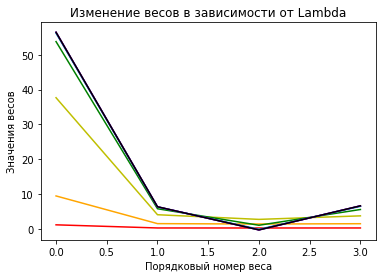

In [144]:
%matplotlib inline

plt.title('Изменение весов в зависимости от Lambda')
plt.xlabel('Порядковый номер веса')
plt.ylabel('Значения весов')
plt.plot([0, 1, 2, 3], W_lambda_e2, color='r',  label = 'Lambda = e2')
plt.plot([0, 1, 2, 3], W_lambda_e1, color='orange',  label = 'Lambda = e1')
plt.plot([0, 1, 2, 3], W_lambda_1, color='y',  label = 'Lambda = 1')
plt.plot([0, 1, 2, 3], W_lambda_1e_1, color='g',  label = 'Lambda = 1e-1')
plt.plot([0, 1, 2, 3], W_lambda_1e_2, color='c',  label = 'Lambda = 1e-2')
plt.plot([0, 1, 2, 3], W_lambda_1e_3, color='b',  label = 'Lambda = 1e-3')
plt.plot([0, 1, 2, 3], W_lambda_1e_4, color='m',  label = 'Lambda = 1e-4')
plt.plot([0, 1, 2, 3], W_lambda_1e_5, color='k',  label = 'Lambda = 1e-5')

plt.show()

Вывод: Чем больше Lambda, тем меньше значения весов из-за стремления среднеквадратической ошибки к минимуму

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Сначала стандартизируем, потом нормируем.

In [146]:
X_test1 = X.copy()
scaler_stand = StandardScaler()
scaler_norm = MinMaxScaler()
X_test2 = scaler_stand.fit_transform(X_test1)
X_test3 = scaler_norm.fit_transform(X_test2)
print(X_test3)
print(X_test3.min(), X_test3.max())

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.25000000e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.33511348e-03 6.67779633e-03
  1.38026225e-03 0.00000000e+00 2.66844563e-03 4.50225113e-03
  0.00000000e+00 1.00100100e-03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.33511348e-03 0.00000000e+00
  6.90131125e-04 1.25000000e-03 1.33422282e-03 1.00050025e-03
  0.00000000e+00 1.00100100e-03]]
0.0 1.0


Данные отмасштабированы от 0 до 1 по последнему методу. Теперь наоборот: нормируем, потом стандартизируем.

In [147]:
X_test11 = X.copy()
scaler_stand = StandardScaler()
scaler_norm = MinMaxScaler()
X_test22 = scaler_norm.fit_transform(X_test1)
X_test33 = scaler_stand.fit_transform(X_test2)
print(X_test33)
print(X_test33.min(), X_test33.max())

[[-0.57735027 -0.57735027 -0.57940718 -0.58249071 -0.57894479 -0.57638682
  -0.58043426 -0.58158972 -0.57735027 -0.57889218]
 [-0.57735027 -0.57735027 -0.57632113 -0.5670349  -0.57575501 -0.57927597
  -0.57426353 -0.57117319 -0.57735027 -0.57657893]
 [ 1.73205081  1.73205081  1.73204943  1.73201633  1.73204971  1.7320496
   1.73204669  1.73203785  1.73205081  1.73205004]
 [-0.57735027 -0.57735027 -0.57632113 -0.58249071 -0.5773499  -0.57638682
  -0.5773489  -0.57927494 -0.57735027 -0.57657893]]
-0.582490711396413 1.7320508075688774


Данные отмасштабированы по последнему использованному методу стандартизации.

Ответ: Да, это возможно

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [148]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-2):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        sum_w = 0 
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sum(W))
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [149]:
W_lambda1_1e_2 = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2)
W_lambda1_1e_2

array([56.15860445,  6.12223246, -0.41521581,  6.41348928])

In [150]:
W_lambda2_1e_2 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-2)
W_lambda2_1e_2

array([56.21890547,  6.23067581, -0.16462974,  6.42092637])